# Read data and combine dataframes

In [1]:
#invite people for the Kaggle party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
tochi_train = pd.read_csv('../data/train_genba.tsv', sep='\t')
build_train = pd.read_csv('../data/train_goto.tsv', sep='\t')
train = pd.merge(tochi_train, build_train, on="pj_no")

tochi_test = pd.read_csv('../data/test_genba.tsv', sep='\t')
build_test = pd.read_csv('../data/test_goto.tsv', sep='\t')
test = pd.merge(tochi_test, build_test, on="pj_no")

In [3]:
train.columns

Index(['pj_no', 'jukyo', 'chiseki_js_hb', 'chiseki_kb_hb', 'yoto1', 'yoto2',
       'kempei1', 'kempei2', 'yoseki1', 'yoseki2',
       ...
       'setsudo_hi', 'setsudo_kj', 'jigata', 'hiatari', 'niwasaki', 'garage',
       'kobetsu1', 'kobetsu2', 'kobetsu3', 'kobetsu4'],
      dtype='object', length=158)

In [4]:
import pandas_profiling as pdp  # pandas_profilingのインポート
pdp.ProfileReport(train)  # レポートの作成

Number of variables,158
Number of observations,6461
Total Missing (%),41.4%
Total size in memory,7.8 MiB
Average record size in memory,1.2 KiB
Numeric,47
Categorical,102
Boolean,1
Date,0
Text (Unique),1
Rejected,7


# Analyzing sale price

In [5]:
train['keiyaku_pr'].describe()

count    6.461000e+03
mean     2.782169e+07
std      6.853475e+06
min      2.800000e+06
25%      2.330000e+07
50%      2.700000e+07
75%      3.180000e+07
max      6.280000e+07
Name: keiyaku_pr, dtype: float64

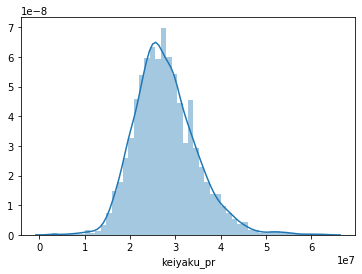

In [6]:
sns.distplot(train['keiyaku_pr'])

- Deviating from normal distribution
- Positively skewed a bit
- Low peakedness

In [7]:
#skewness and kurtosis
print("Skewness: %f" % train['keiyaku_pr'].skew()) # Off-center. Abs. value > 1 = 'highly skewed'
print("Kurtosis: %f" % train['keiyaku_pr'].kurt()) # Peakedness. 3 = Normal Distribution

Skewness: 0.666622
Kurtosis: 1.408705


# Numerical variable relationships

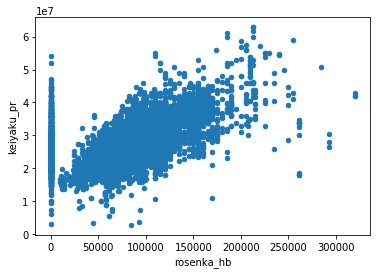

In [24]:
#scatter plot rosenka_hb/saleprice
var = 'rosenka_hb'
data = pd.concat([train['keiyaku_pr'], train[var]], axis=1)
data.plot.scatter(x=var, y='keiyaku_pr');

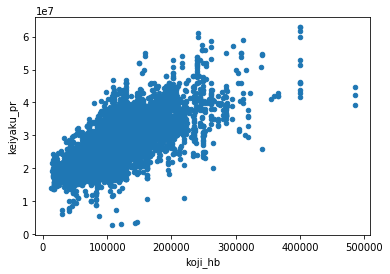

In [25]:
#scatter plot koji_hb/saleprice
var = 'koji_hb'
data = pd.concat([train['keiyaku_pr'], train[var]], axis=1)
data.plot.scatter(x=var, y='keiyaku_pr');

Both variables are positively linear

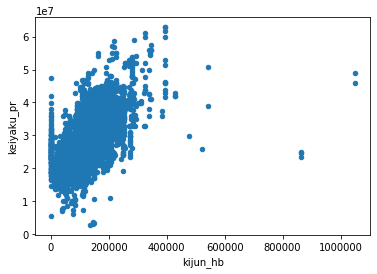

In [26]:
#scatter plot kijun_hb/saleprice
var = 'kijun_hb'
data = pd.concat([train['keiyaku_pr'], train[var]], axis=1)
data.plot.scatter(x=var, y='keiyaku_pr');

Positively linear with higher slope

# Categorical variable relationships

[None, None, None, None, None, None, None, None]

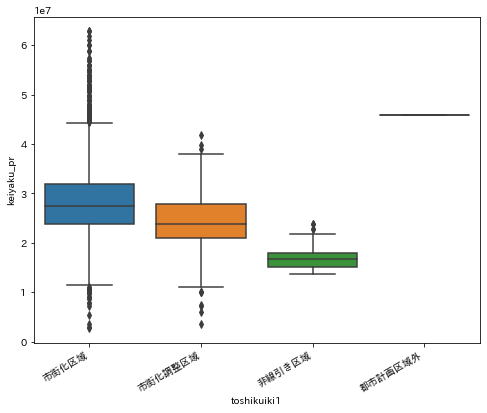

In [45]:
import japanize_matplotlib 
#box plot 
var = 'toshikuiki1'
data = pd.concat([train['keiyaku_pr'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="keiyaku_pr", data=data)
fig.axis();
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')

[None, None, None, None, None, None, None, None, None, None, None, None]

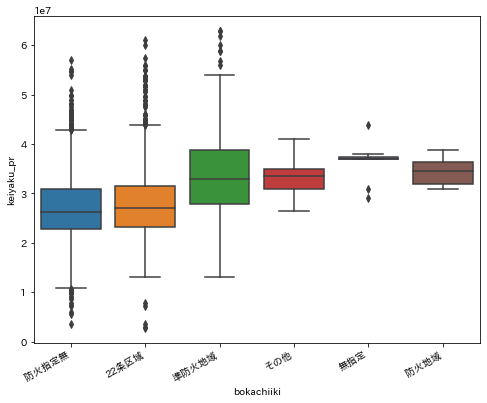

In [48]:
var = 'bokachiiki'
data = pd.concat([train['keiyaku_pr'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="keiyaku_pr", data=data)
fig.axis();
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

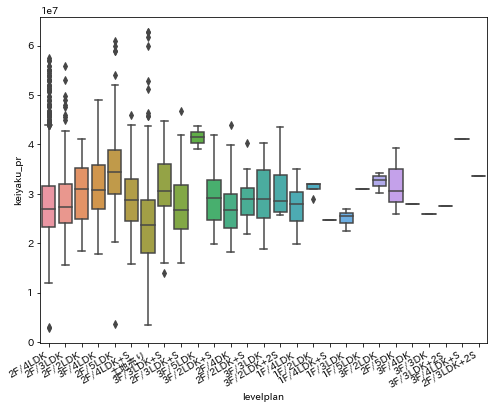

In [50]:
var = 'levelplan'
data = pd.concat([train['keiyaku_pr'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="keiyaku_pr", data=data)
fig.axis();
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

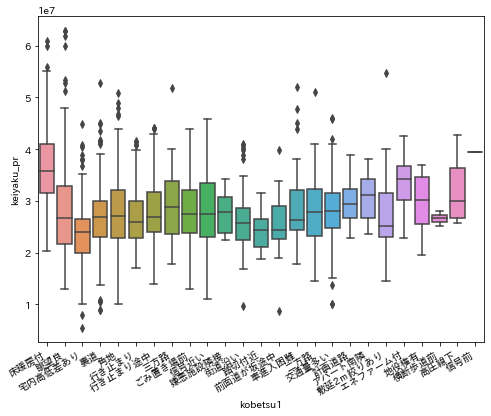

In [53]:
var = 'kobetsu1'
data = pd.concat([train['keiyaku_pr'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="keiyaku_pr", data=data)
fig.axis();
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

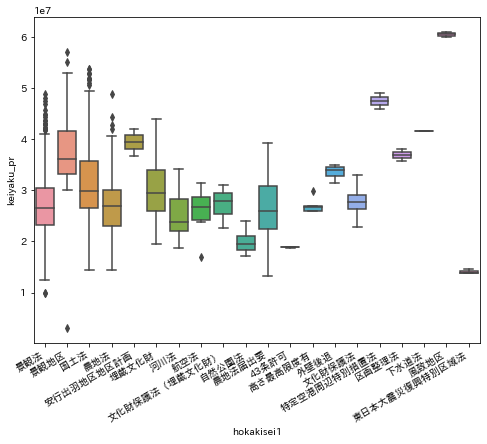

In [54]:
var = 'hokakisei1'
data = pd.concat([train['keiyaku_pr'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="keiyaku_pr", data=data)
fig.axis();
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')

# Objective Analysis

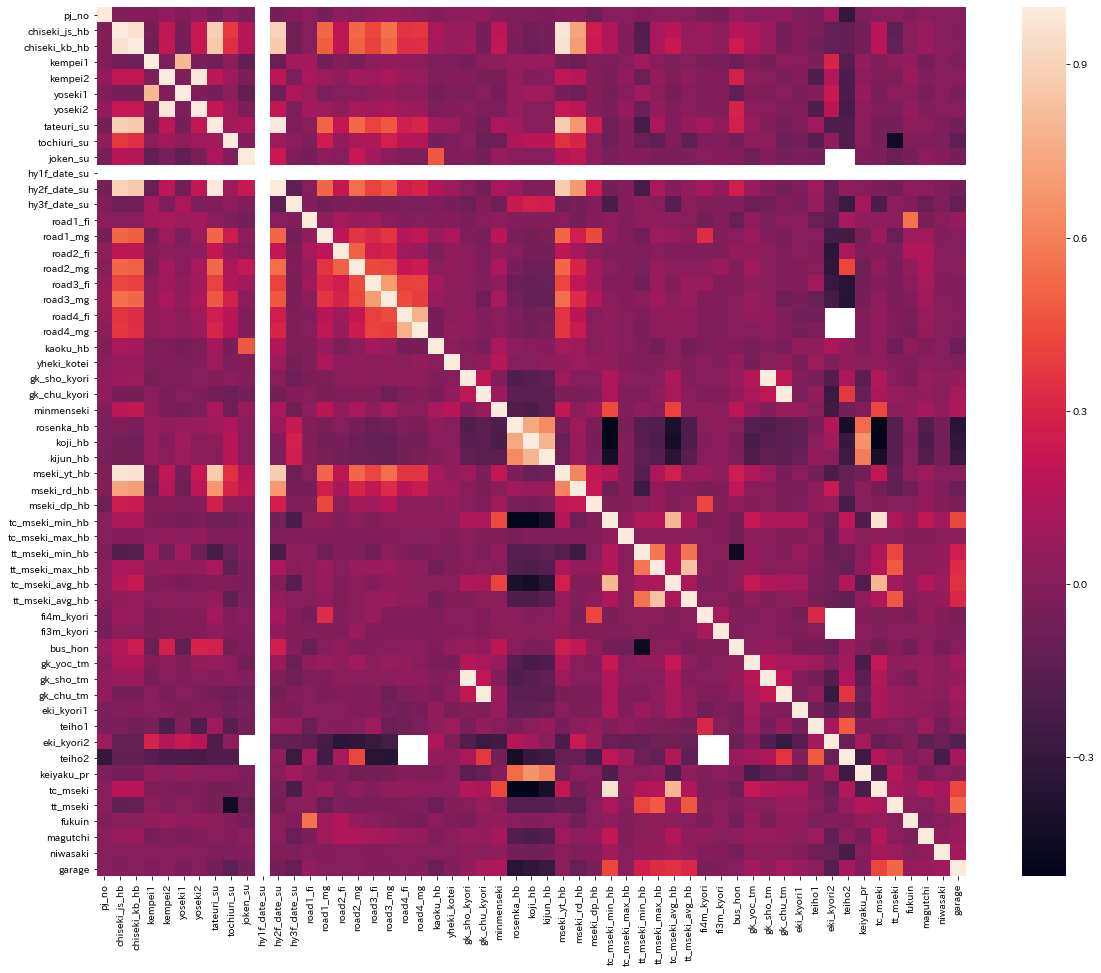

In [58]:
#correlation matrix
corrmat = train.corr()
f, ax = plt.subplots(figsize=(20,16))
sns.heatmap(corrmat,square=True);

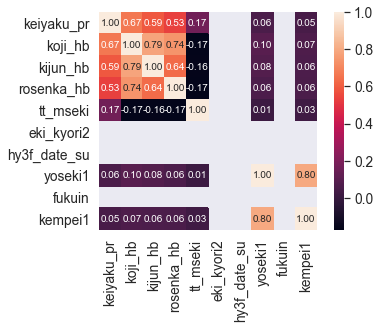

In [61]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'keiyaku_pr')['keiyaku_pr'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

- 信じられるのはkoji_hb, kijun_hb, rosenka_hbだけ！
- 面積・駅距離・3階建て数も使えそう
- 建ぺい率・容積率・幅員（前の道路の幅）も
- 全体的に相対性が低い

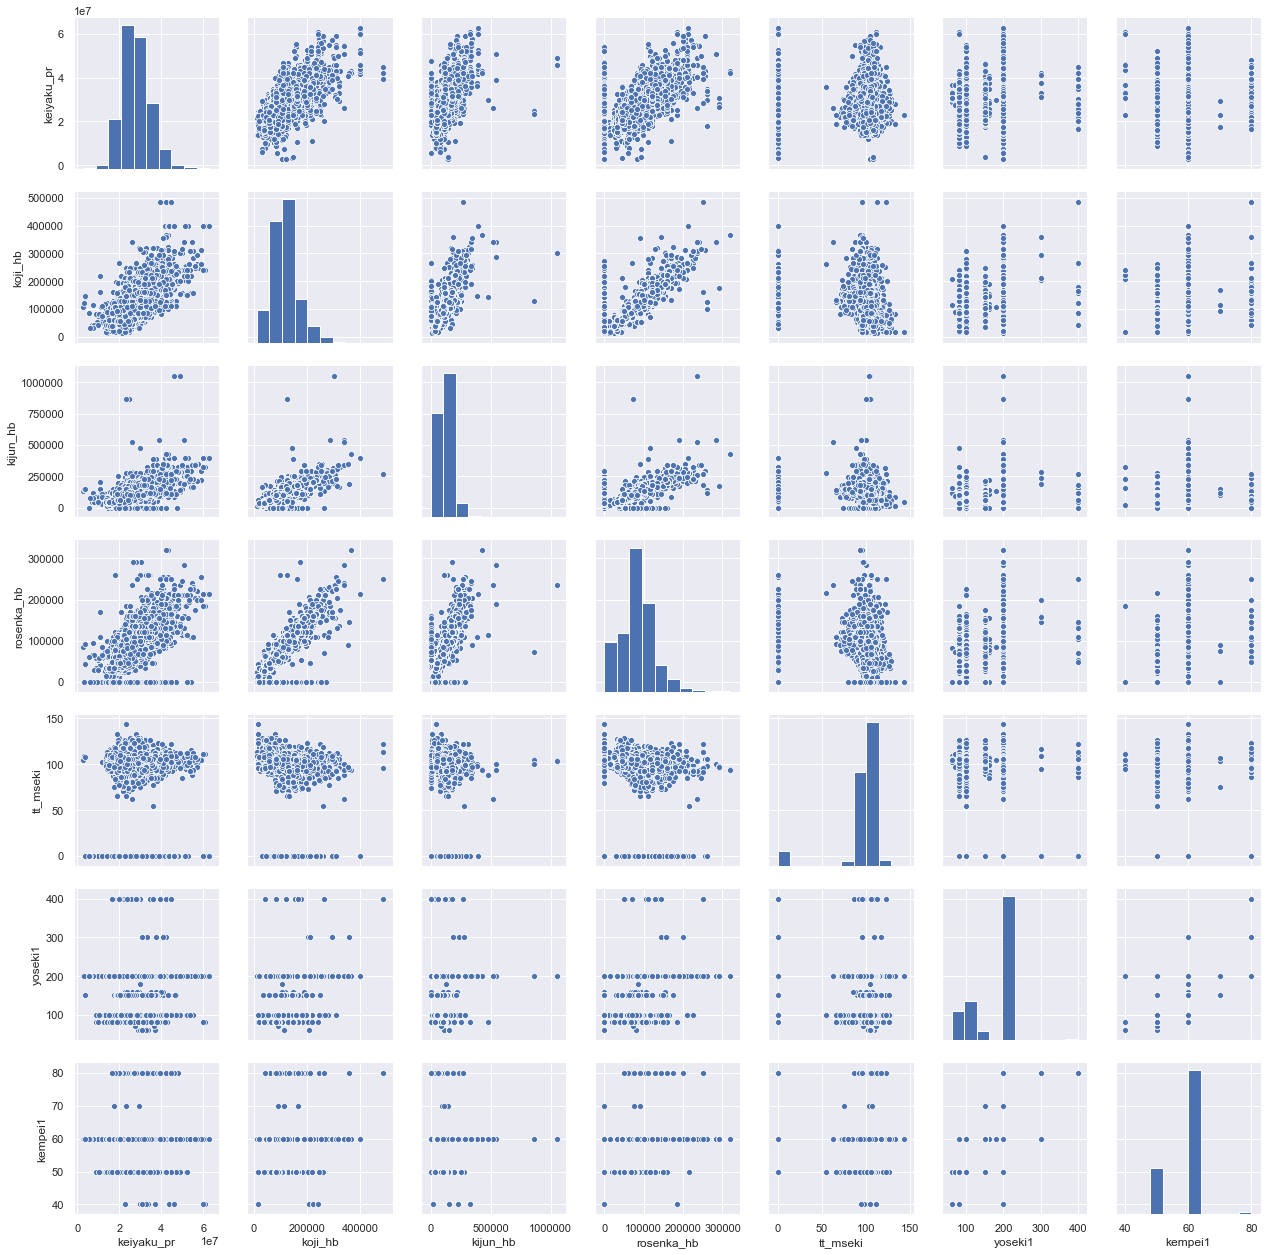

In [64]:
#scatterplot
sns.set()
cols = ['keiyaku_pr', 'koji_hb', 'kijun_hb', 'rosenka_hb', 'tt_mseki', 'yoseki1','kempei1']
sns.pairplot(train[cols], size = 2.5)
plt.show();

# Missing data

In [69]:
#missing data
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([percent], axis=1, keys=['Percent'])
missing_data[percent > 0.15]

,Percent
shu_sogi,0.999536
rs_n_m_ari,0.996440
shu_highway,0.996131
shu_tower,0.996131
rs_w_m_ari,0.994892
hokakisei4,0.994428
shu_bochi,0.993499
shu_soon,0.992571
kobetsu4,0.992416
rs_w_zoki,0.992261


欠如値のほとんどはone-hot-encodingで対応する。
対応後に欠如値が15％以上あるものを削除したら、精度が下がったので、今のところ放置でいいっぽい。

# Outliers

In [70]:
#standardizing data
saleprice_scaled = StandardScaler().fit_transform(train['keiyaku_pr'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-3.65123192]
 [-3.62204738]
 [-3.54908604]
 [-3.53449377]
 [-3.25724068]
 [-3.18427934]
 [-3.00917212]
 [-2.99457985]
 [-2.96539532]
 [-2.92161851]]

outer range (high) of the distribution:
[[4.25777738]
 [4.33073872]
 [4.5204382 ]
 [4.53503047]
 [4.69262696]
 [4.69554542]
 [4.83854964]
 [4.95820624]
 [5.10412892]
 [5.10412892]]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


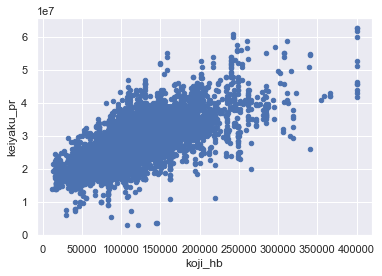

In [102]:
#bivariate analysis saleprice/grlivarea
var = 'koji_hb'
data = pd.concat([train['keiyaku_pr'], train[var]], axis=1)
data.plot.scatter(x=var, y='keiyaku_pr');

# Normality

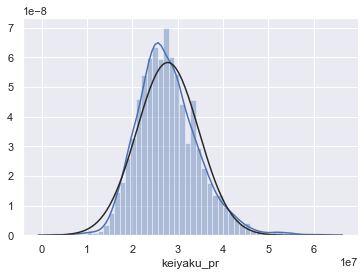

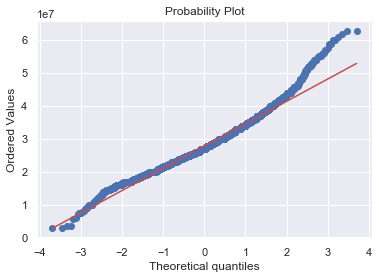

In [103]:
#histogram and normal probability plot
sns.distplot(train['keiyaku_pr'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['keiyaku_pr'], plot=plt)

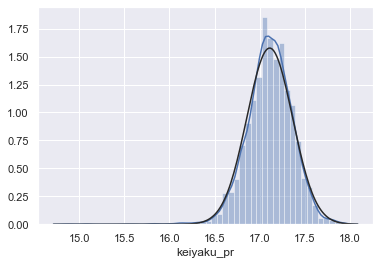

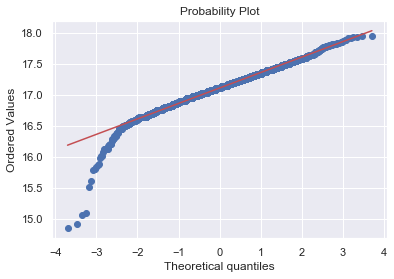

In [104]:
#applying log transformation

sns.distplot(np.log(train['keiyaku_pr']), fit=norm);
fig = plt.figure()
res = stats.probplot(np.log(train['keiyaku_pr']), plot=plt)

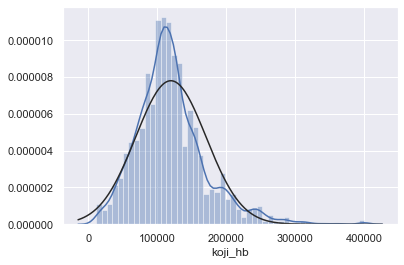

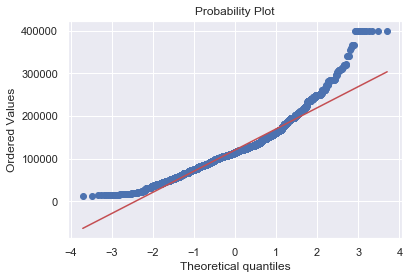

In [106]:
#histogram and normal probability plot
sns.distplot(train['koji_hb'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['koji_hb'], plot=plt)

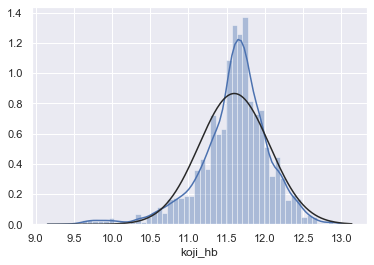

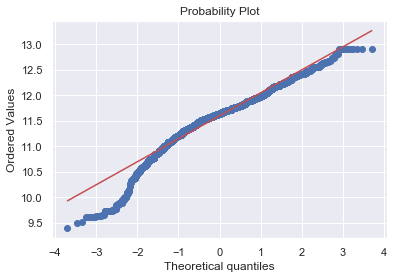

In [107]:
#applying log transformation

sns.distplot(np.log(train['koji_hb']), fit=norm);
fig = plt.figure()
res = stats.probplot(np.log(train['koji_hb']), plot=plt)

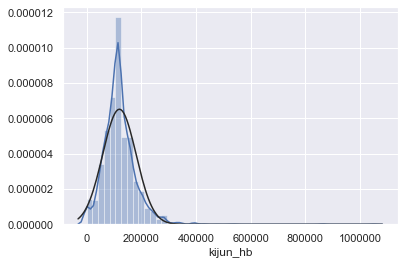

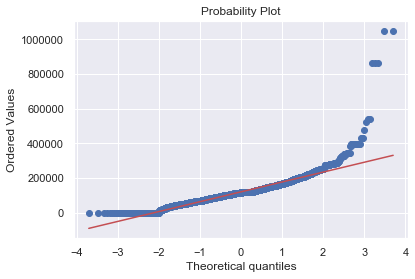

In [109]:
#histogram and normal probability plot
sns.distplot(train['kijun_hb'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['kijun_hb'], plot=plt)

In [113]:
#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0
train['has_kijun'] = pd.Series(len(train['kijun_hb']), index=train.index)
train['has_kijun'] = 0 
train.loc[train['kijun_hb']>0,'has_kijun'] = 1

#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0
train['has_rosenka'] = pd.Series(len(train['rosenka_hb']), index=train.index)
train['has_rosenka'] = 0 
train.loc[train['rosenka_hb']>0,'has_rosenka'] = 1

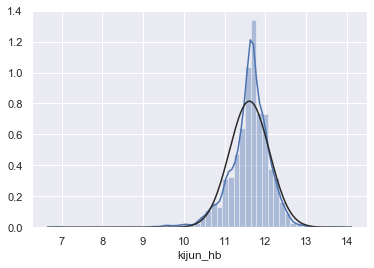

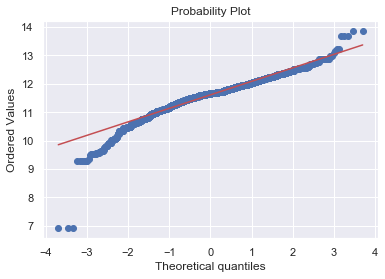

In [112]:
#transform data
train.loc[train['has_kijun']==1,'kijun_hb'] = np.log(train['kijun_hb'])

#histogram and normal probability plot
sns.distplot(train[train['kijun_hb']>0]['kijun_hb'], fit=norm);
fig = plt.figure()
res = stats.probplot(train[train['kijun_hb']>0]['kijun_hb'], plot=plt)

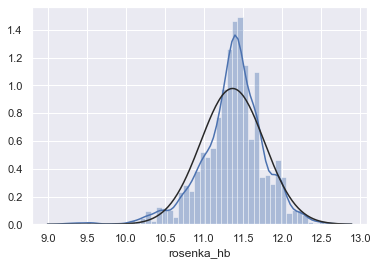

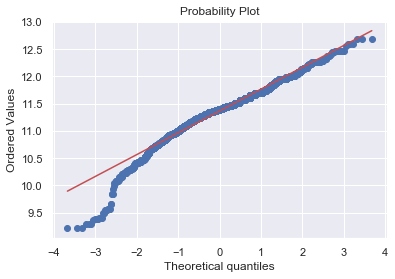

In [114]:
#transform data
train.loc[train['has_rosenka']==1,'rosenka_hb'] = np.log(train['rosenka_hb'])

#histogram and normal probability plot
sns.distplot(train[train['rosenka_hb']>0]['rosenka_hb'], fit=norm);
fig = plt.figure()
res = stats.probplot(train[train['rosenka_hb']>0]['rosenka_hb'], plot=plt)